In [404]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [405]:
csv = pd.read_csv("/Users/ihsanbolum/Downloads/social-comment-map-main/YoutubeCommentsDataSet.csv")

csv.head()


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [406]:
csv["ai_kindness"] = ""
csv["ai_seroiusnes"] = ""
csv["user_nickname"] = ""
csv["nickname_score"] = ""
csv.head()

,Comment,Sentiment,ai_kindness,ai_seroiusnes,user_nickname,nickname_score
0,lets not forget that apple pay in 2014 require...,neutral,,,,
1,here in nz 50 of retailers don’t even have con...,negative,,,,
2,i will forever acknowledge this channel with t...,positive,,,,
3,whenever i go to a place that doesn’t take app...,negative,,,,
4,apple pay is so convenient secure and easy to ...,positive,,,,


In [407]:
import ollama


In [414]:
import time 

golabal_comment_count = 0

single_name_prompt = """
Generate exactly ONE random username that could appear on social media. Those could be nicknames, real life names, names of famous personalities or anyting else. dont forget to use real names sometimes. Return the nick name alone , without any explanation or addition text"""




def random_ai_name():
    response = ollama.generate(model="llama3.1:8b", prompt= single_name_prompt)
    return response["response"]


def nickname_score():
    response = ollama.generate(model="llama3.1:8b", prompt= ai_nick_score_prompt)
    return response["response"]

def kindness_score():
    response = ollama.generate(model="llama3.1:8b", prompt= kindness_prompt)
    return response["response"]

def seriousness_score():
    response = ollama.generate(model="llama3.1:8b", prompt= seriousness_prompt)
    return response["response"]



ai_nick_score_prompt = f""" Analyze the username "{control_name}" and estimate from 0.00 to 1.00 how likely it is to be a real person's legal name. Dont forget, you can score only between 0.00 and 1.00.  You ONLY give the score, without any additional text. Example: "0.4" or "0.85".
"""

kindness_prompt = f"""Analyze this comment for harmful content: "{csv.iloc[golabal_comment_count][0]}" SCORING GUIDE: 0.0:, 1.0: Direct threats or extreme hate speech. Dont forget, you can score only between 0.0 and 1.0. You ONLY give the score, without any additional text. Example: "0.4" or "0.85"
"""

seriousness_prompt = f""" Analyze the seriousness and intent of this comment: "{csv.iloc[golabal_comment_count][0]}" SCORING GUIDE: 0.0,  1.0: Extremely serious, threatening, or potentially damaging Consider these factors: - Use of emojis, jokes, or sarcasm indicators - Formal vs. informal language - Emotional weight and topic sensitivity - Clear intent to harm vs. inform vs. entertain Dont forget, you can score only between 0.0 and 1.0.  You ONLY give the score, without any additional text. Example: "0.4" or "0.85"""


/var/folders/ls/vwzpb4gs5p11s0862ytdycch0000gn/T/ipykernel_4417/465614889.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kindness_prompt = f"""Analyze this comment for harmful content: "{csv.iloc[golabal_comment_count][0]}" SCORING GUIDE: 0.0:, 1.0: Direct threats or extreme hate speech. Dont forget, you can score only between 0.0 and 1.0. You ONLY give the score, without any additional text. Example: "0.4" or "0.85"
/var/folders/ls/vwzpb4gs5p11s0862ytdycch0000gn/T/ipykernel_4417/465614889.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seriousness_prompt = f""" Analyze the seriousness and intent of this c

In [415]:
import re

for i in range(10):
    for s in range(1):
        csv.iloc[i, 4] = f"{random_ai_name()}"
        csv.iloc[i, 5] = f"{nickname_score()}"
        csv.iloc[i, 2] = f"{kindness_score()}"
        csv.iloc[i, 3] = f"{seriousness_score()}"
        golabal_comment_count += 1

csv.head()

,Comment,Sentiment,ai_kindness,ai_seroiusnes,user_nickname,nickname_score
0,lets not forget that apple pay in 2014 require...,neutral,0.05,0.15,@Lil_Yungin23,0.32
1,here in nz 50 of retailers don’t even have con...,negative,0.0,0.05,LilDopeyMcGee,0.12
2,i will forever acknowledge this channel with t...,positive,0.0,0.05,LilUziVert,0.12
3,whenever i go to a place that doesn’t take app...,negative,0.15,0.15,LilWayne7,0.02
4,apple pay is so convenient secure and easy to ...,positive,0.0,0.2,DreidelStar,0.02


In [476]:
csv.head(30)

,Comment,Sentiment,ai_kindness,ai_seroiusnes,user_nickname,nickname_score
0,lets not forget that apple pay in 2014 require...,neutral,0.05,0.15,@Lil_Yungin23,0.32
1,here in nz 50 of retailers don’t even have con...,negative,0.0,0.05,LilDopeyMcGee,0.12
2,i will forever acknowledge this channel with t...,positive,0.0,0.05,LilUziVert,0.12
3,whenever i go to a place that doesn’t take app...,negative,0.15,0.15,LilWayne7,0.02
4,apple pay is so convenient secure and easy to ...,positive,0.0,0.2,DreidelStar,0.02
5,we’ve been hounding my bank to adopt apple pay...,neutral,0.0,0.2,XxLilithLoveXx,0.05
6,we only got apple pay in south africa in 20202...,positive,0.0,0.15,LilBaby88,0.25
7,for now i need both apple pay and the physical...,neutral,0.0,0.2,Moonchild88,0.02
8,in the united states we have an abundance of r...,positive,0.2,0.2,PaprikaPwnz,0.05
9,in cambodia we have a universal qr code system...,neutral,0.00,0.2,@LunaNightshade,0.2


In [480]:
csv.iloc[0][5]

/var/folders/ls/vwzpb4gs5p11s0862ytdycch0000gn/T/ipykernel_4417/887158430.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  csv.iloc[0][5]


'0.32'

In [489]:
type(csv.iloc[0][2])

/var/folders/ls/vwzpb4gs5p11s0862ytdycch0000gn/T/ipykernel_4417/1194475894.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(csv.iloc[0][2])


str

In [491]:
for i in range(30):
    csv.loc[i, "ai_kindness"] = float(csv.loc[i, "ai_kindness"])#kindness
    csv.loc[i, "ai_seroiusnes"] = float(csv.loc[i, "ai_seroiusnes"])#seroiusness
    csv.loc[i, "nickname_score"] = float(csv.loc[i, "nickname_score"])#Nick_score

/var/folders/ls/vwzpb4gs5p11s0862ytdycch0000gn/T/ipykernel_4417/1018934337.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = csv.iloc[s][2] # Kindess
/var/folders/ls/vwzpb4gs5p11s0862ytdycch0000gn/T/ipykernel_4417/1018934337.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = csv.iloc[s][3]   #Seroiusness
/var/folders/ls/vwzpb4gs5p11s0862ytdycch0000gn/T/ipykernel_4417/1018934337.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

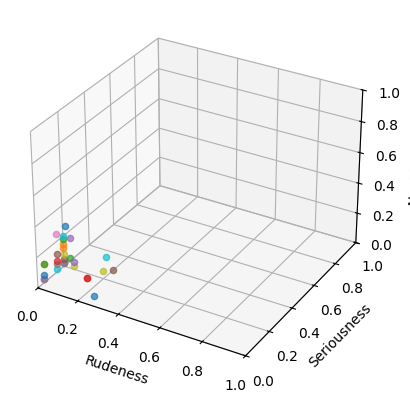

In [519]:



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for s in range(30):
    for m  in ('o'):
        x = csv.iloc[s][2] # Kindess
        y = csv.iloc[s][3]   #Seroiusness
        z = csv.iloc[s][5]   #Nickname_score

    

    ax.scatter(x,y,z, marker=m, alpha= 0.7)

ax.set_xlabel('Rudeness')
ax.set_ylabel('Seriousness')
ax.set_zlabel('Name_Score')

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)


plt.show()